## Import

In [1]:
# libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [16]:
# dataset
data = pd.read_csv('diabetes.csv')
data.head(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,0,1,26,0,0,0,1,0,...,1,0,3,5,30,0,1,4,6,8
1,0,1,1,1,26,1,1,0,0,1,...,1,0,3,0,0,0,1,12,6,8
2,0,0,0,1,26,0,0,0,1,1,...,1,0,1,0,10,0,1,13,6,8
3,0,1,1,1,28,1,0,0,1,1,...,1,0,3,0,3,0,1,11,6,8
4,0,0,0,1,29,1,0,0,1,1,...,1,0,2,0,0,0,0,8,5,8


## Summary

In [3]:
# data overview
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Diabetes_binary       70692 non-null  int64
 1   HighBP                70692 non-null  int64
 2   HighChol              70692 non-null  int64
 3   CholCheck             70692 non-null  int64
 4   BMI                   70692 non-null  int64
 5   Smoker                70692 non-null  int64
 6   Stroke                70692 non-null  int64
 7   HeartDiseaseorAttack  70692 non-null  int64
 8   PhysActivity          70692 non-null  int64
 9   Fruits                70692 non-null  int64
 10  Veggies               70692 non-null  int64
 11  HvyAlcoholConsump     70692 non-null  int64
 12  AnyHealthcare         70692 non-null  int64
 13  NoDocbcCost           70692 non-null  int64
 14  GenHlth               70692 non-null  int64
 15  MentHlth              70692 non-null  int64
 16  Phys

- 22 columns, 70692 rows
- all int datatype
- no null records

In [13]:
# check duplicates
data.duplicated().sum()

1635

In [17]:
# drop duplicates
data.drop_duplicates(inplace = True)
data.shape

(69057, 22)

69057 in total after dropping duplicates

In [18]:
for col in data:
    print(f'{col}: {data[col].unique()}')

Diabetes_binary: [0 1]
HighBP: [1 0]
HighChol: [0 1]
CholCheck: [1 0]
BMI: [26 28 29 18 31 32 27 24 21 58 30 20 22 38 40 25 36 47 19 37 41 23 34 35
 42 17 33 44 15 52 69 56 45 39 92 53 98 50 46 79 48 16 63 72 54 49 68 43
 84 73 76 55 51 75 57 60 12 77 82 67 71 61 14 81 59 86 13 87 65 95 89 62
 64 66 85 70 83 80 78 74]
Smoker: [0 1]
Stroke: [0 1]
HeartDiseaseorAttack: [0 1]
PhysActivity: [1 0]
Fruits: [0 1]
Veggies: [1 0]
HvyAlcoholConsump: [0 1]
AnyHealthcare: [1 0]
NoDocbcCost: [0 1]
GenHlth: [3 1 2 4 5]
MentHlth: [ 5  0  7  3  4  2 30 20  1 15 10 25 14 28  6 29 26 12 16 22 13  8  9 21
 18 17 27 24 23 11 19]
PhysHlth: [30  0 10  3  6  4 15  1  2 14  7 25 21 20  5  8 22 23 29 12 18 28 26 24
 27 11 13 16 17  9 19]
DiffWalk: [0 1]
Sex: [1 0]
Age: [ 4 12 13 11  8  1  6  3  7 10  9  5  2]
Education: [6 5 4 3 2 1]
Income: [8 7 6 3 4 1 5 2]


- most columns are boolean type, with values being 0 and 1
- the columns that are really numerical: 
    1. BMI
    2. GenHlth
    3. MentHlth
    4. PhysHlth
    5. Age
    6. Education
    7. Income

## Graphs

### 1. Distribution

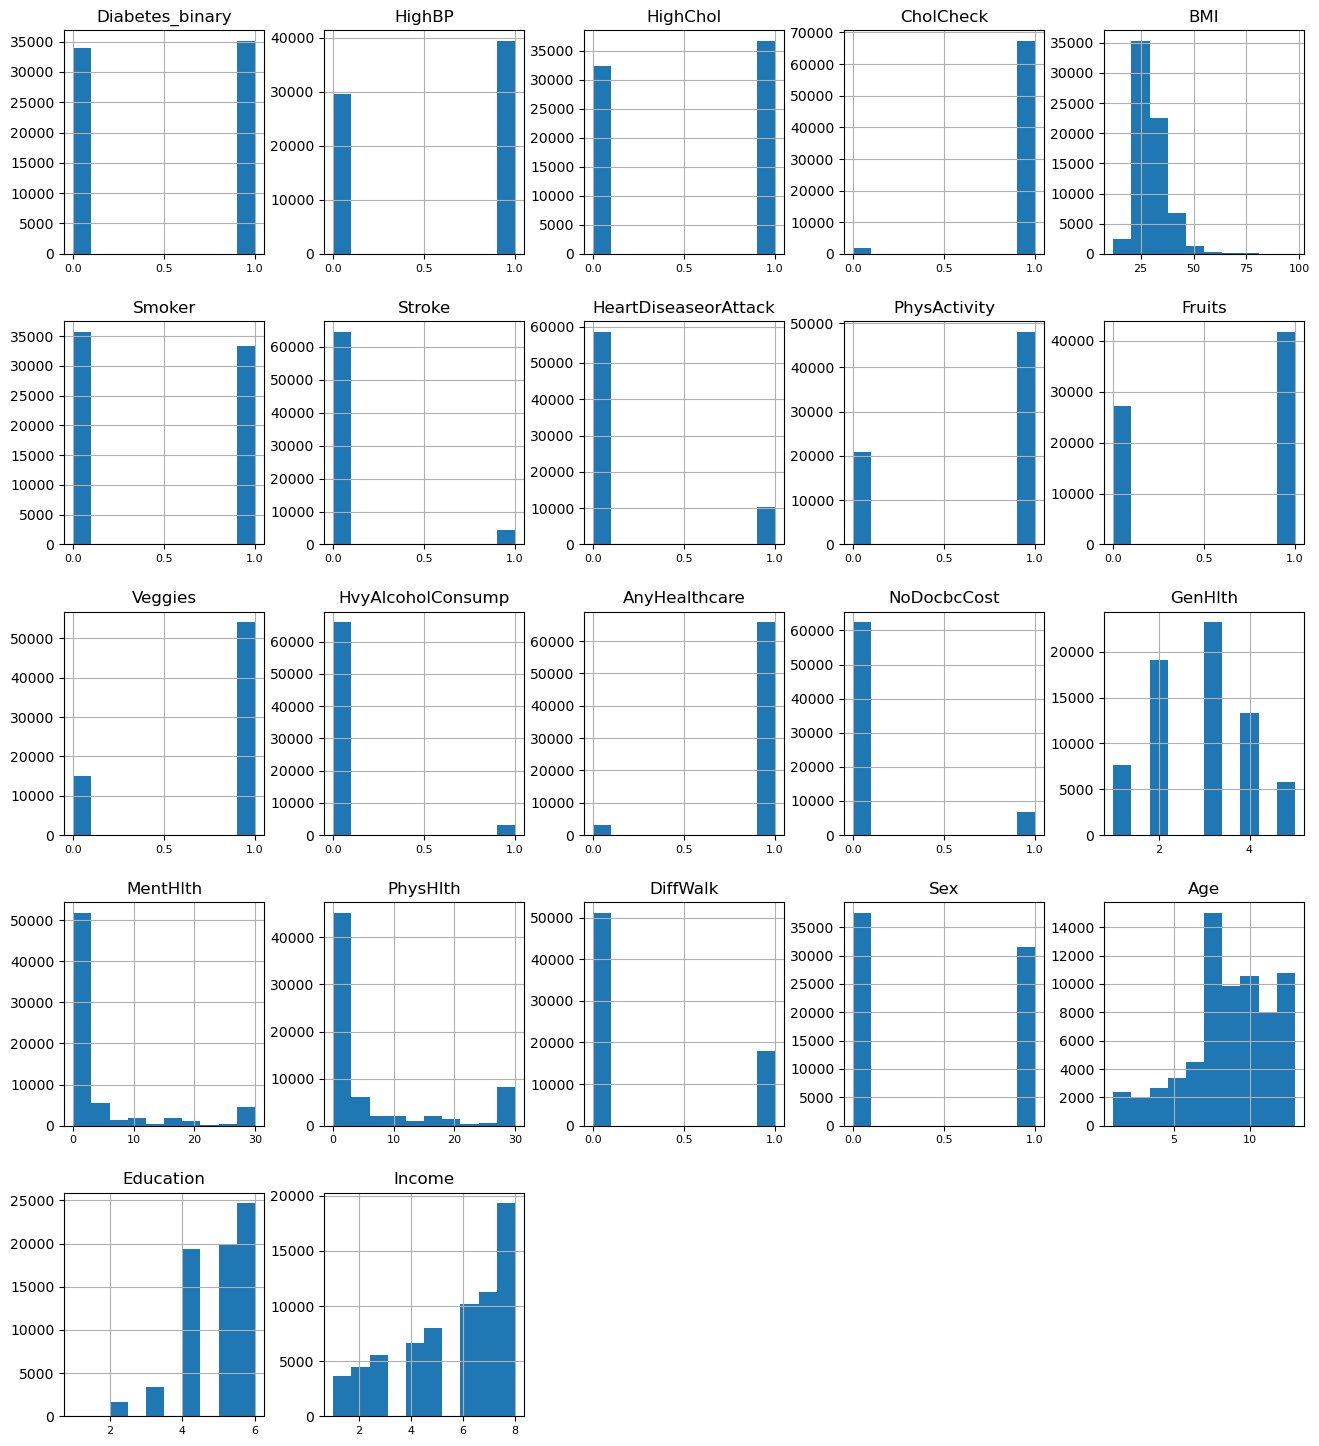

In [19]:
# distribution plot
data.hist(xlabelsize = 8, ylabelsize = 10, linewidth = 5, figsize = (16,18))
plt.show()

- diabetes patients are split almost equally into 50-50. 
- noticeable difference in the following columns: 
    1. CholCheck
    2. Stroke
    3. HeartDiseaseorAttack
    4. PhysActivity
    5. Fruits
    6. Veggies
    7. DiffWalk
    8. HvyAlcolholConsump
    9. AnyHealthcare
    10. NoDocbcCost

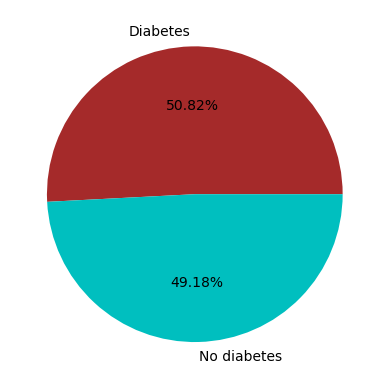

In [27]:
# plot pie chart for the DV
plt.pie(data['Diabetes_binary'].value_counts(),
        labels = ['Diabetes', 'No diabetes'],
        autopct='%1.2f%%',
        colors = ['brown', 'c'])
plt.show() 

### 2. Outliers

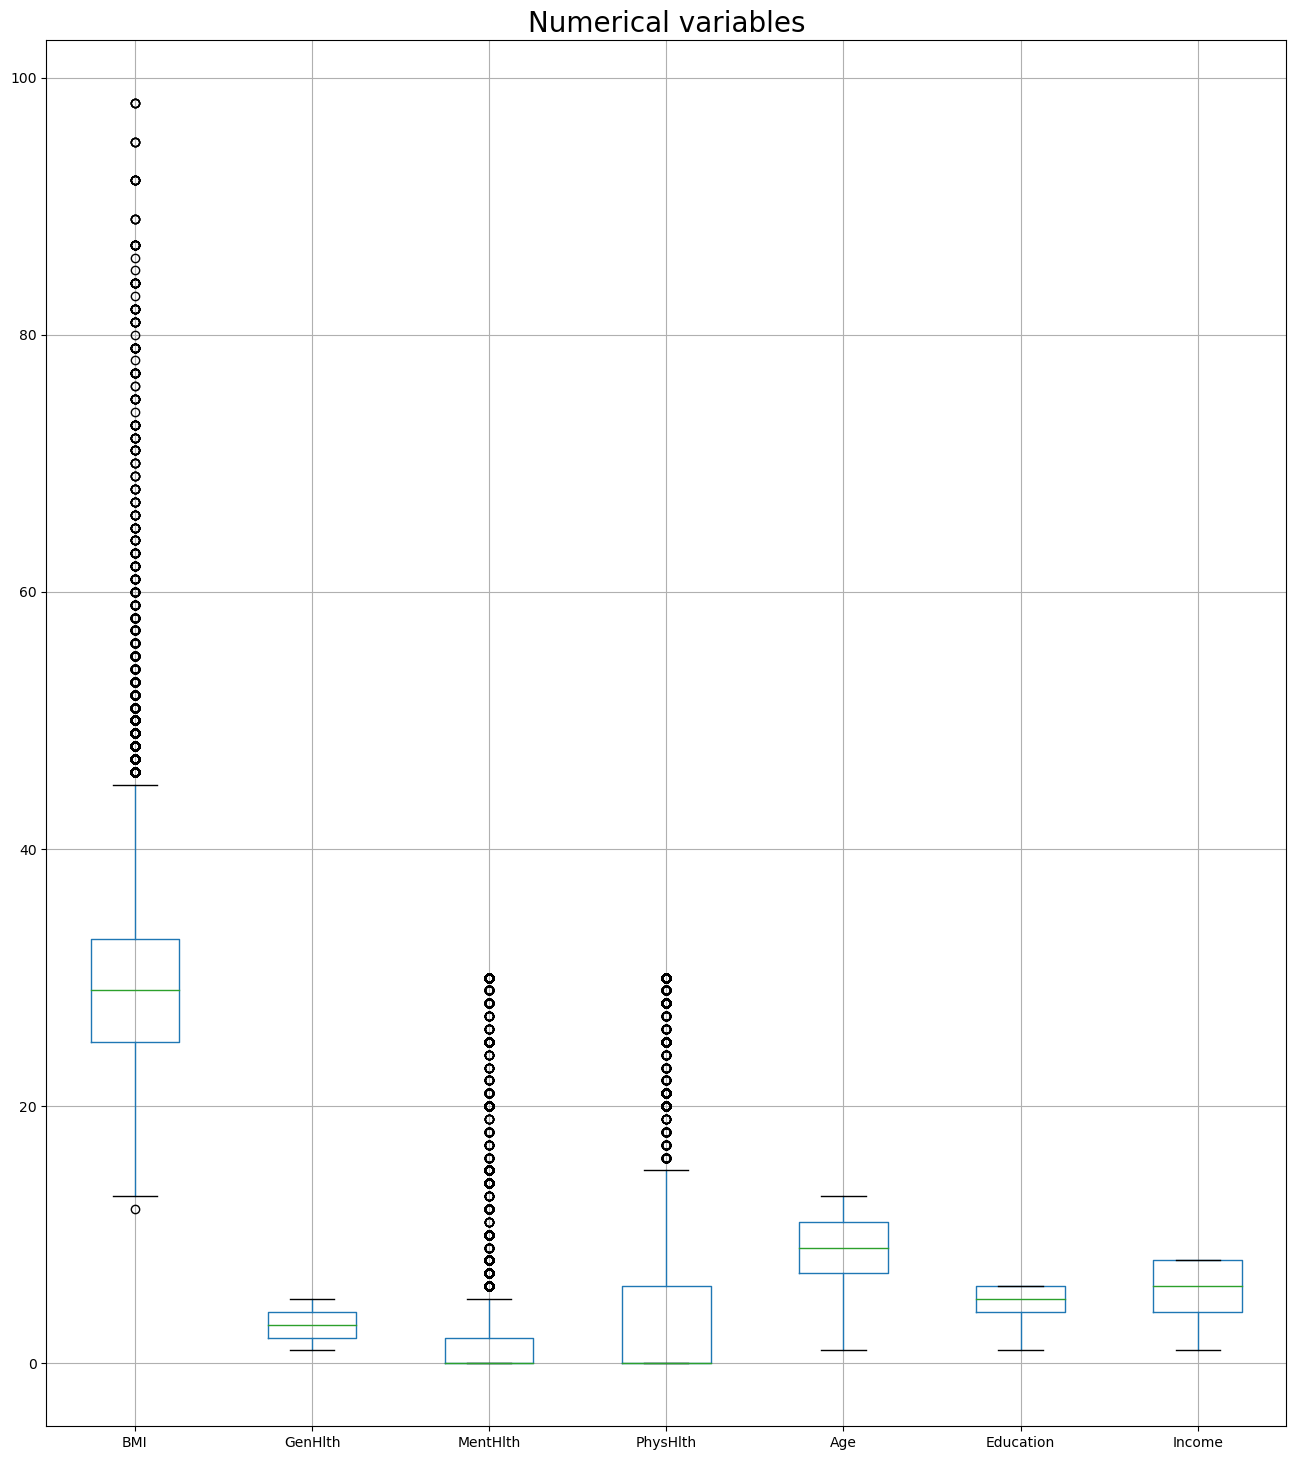

In [6]:
# boxplot of numerical columns
# list of numerical columns
df_num = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']
# boxplot
plt.figure(figsize=(16, 18))
data[df_num].boxplot()
plt.title("Numerical variables", fontsize=20)
plt.show()

Lots of outliers for BMI, Mental Health, and Physical Health

C:\Users\DELL\AppData\Local\Temp\ipykernel_13704\4166480114.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], color = 'black', bins = 100, hist_kws = {'alpha': 0.4})
C:\Users\DELL\AppData\Local\Temp\ipykernel_13704\4166480114.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[

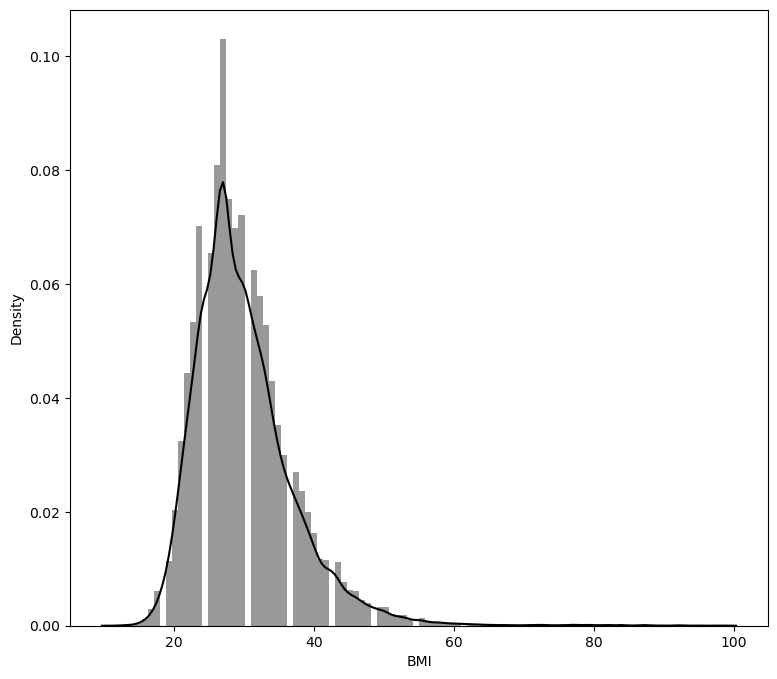

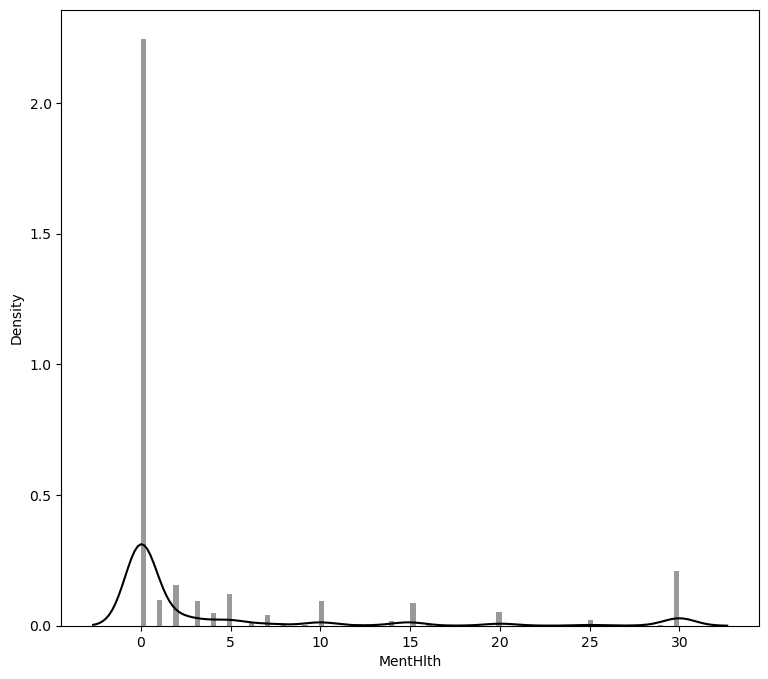

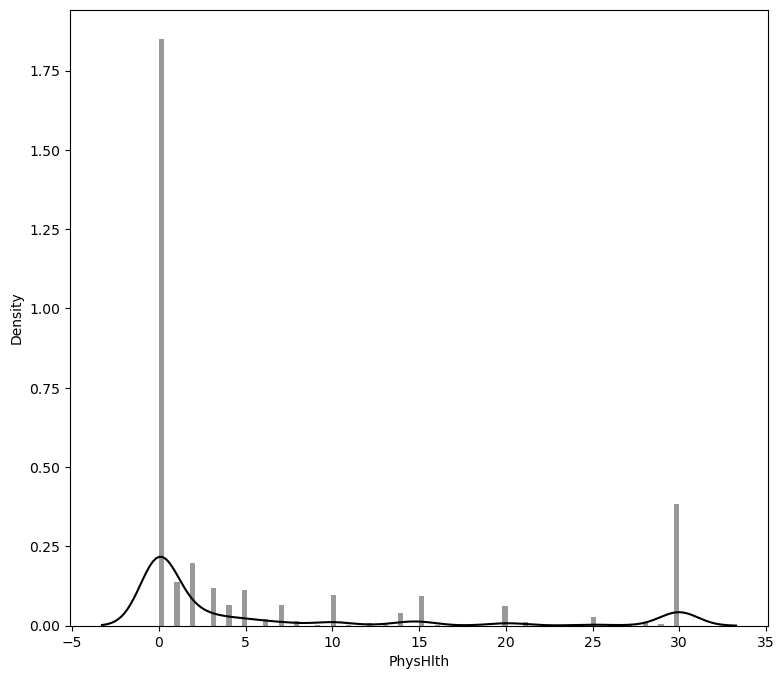

In [28]:
# outliers distribution
# outlier columns
df_outl = ['BMI', 'MentHlth', 'PhysHlth']
# plot
for col in df_outl:
    plt.figure(figsize=(9, 8))
    sns.distplot(data[col], color = 'black', bins = 100, hist_kws = {'alpha': 0.4})

- All 3 columns are skewed left
- BMI has outliers in the 30 range
- MentHlth and PhysHlth have outliers in the 0 range
- This is to be dealt with Feature Engineering.

## Correlation

In [29]:
data_corr = data.corr()['Diabetes_binary'].sort_values(ascending=False)
data_corr

Diabetes_binary         1.000000
GenHlth                 0.396571
HighBP                  0.372048
BMI                     0.285643
HighChol                0.281399
Age                     0.274550
DiffWalk                0.267082
HeartDiseaseorAttack    0.207229
PhysHlth                0.206868
Stroke                  0.122727
CholCheck               0.118900
MentHlth                0.080688
Smoker                  0.075853
Sex                     0.042538
NoDocbcCost             0.036145
AnyHealthcare           0.027034
Fruits                 -0.044560
Veggies                -0.072181
HvyAlcoholConsump      -0.098709
PhysActivity           -0.150281
Education              -0.158522
Income                 -0.212846
Name: Diabetes_binary, dtype: float64

<Axes: >

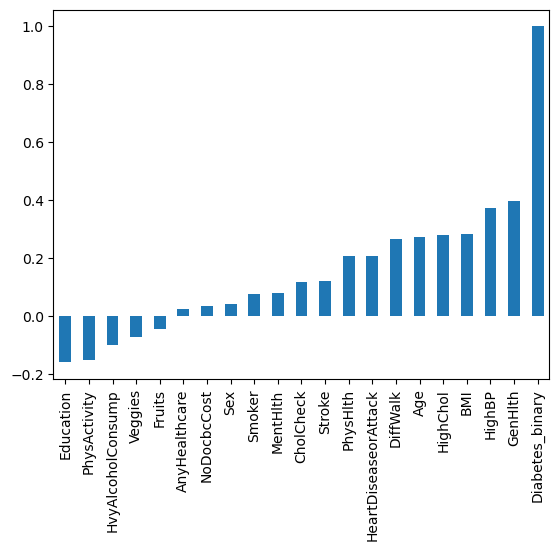

In [30]:
# correlation chart
data.corr()['Diabetes_binary'][:-1].sort_values().plot(kind='bar')

- None of the IVs have > 0.5 correlation with the DV
- GenHlth and HighBP have the highest correlation among the variables, 0.4 and 0.38, respectively. This falls into the range of moderate correlation.
- BMI, HighChol, Age, and DiffWalk have quite similar level of correlation.
- Some IVs have negative correlation:
    1. Fruits
    2. Veggies
    3. HvyAlcoholConsump
    4. PhysActivity
    5. Education
    6. Income 
 - Correlation between the 6 columns above and the DV are all low. Plus, columns such as HvyAlcolholConsump, Veggies, and Fruits have a significant difference in their distribution to begin with. Therefore, the negative correlation doesn't really indicate that people who eat more fruits or veggies are more likely to have diabetes. 